<a href="https://colab.research.google.com/github/BharatArora2006/Ads-Forecasting-for-XYX-Ads-company/blob/main/Ad_Forecasting_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Problem
XYX is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. XYX is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

As a Data Sciencist - try to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for the clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from datetime import datetime


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/train_1.csv").fillna(0)
df.head(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [ ]:
df_exog = pd.read_csv("/content/drive/MyDrive/Exog_Campaign_eng.csv")
df_exog.head()

,Exog
0,0
1,0
2,0
3,0
4,0


#EDA

In [ ]:
df_copy = df.copy()


In [ ]:
df.shape

(145063, 551)

In [ ]:
df.isna().sum()/len(df)

Page          0.0
2015-07-01    0.0
2015-07-02    0.0
2015-07-03    0.0
2015-07-04    0.0
             ... 
2016-12-27    0.0
2016-12-28    0.0
2016-12-29    0.0
2016-12-30    0.0
2016-12-31    0.0
Length: 551, dtype: float64

## NULL VALUES
There are some values for some pages for some dates.
the reason likely is that some pages were launched late so they dont have any view before the launch.

In [ ]:
## Checking first and last date
print("Range Start date", df.columns[1])
print("Range End   date", df.columns[-1])


Range Start date 2015-07-01
Range End   date 2016-12-31


In [ ]:
df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,...,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05
mean,1.024882e+03,1.031234e+03,9.731234e+02,1.003791e+03,1.044342e+03,1.108086e+03,1.062624e+03,1.026181e+03,1.030808e+03,1.022828e+03,...,1.357067e+03,1.343449e+03,1.362474e+03,1.484413e+03,1.634242e+03,1.635483e+03,1.590915e+03,1.639885e+03,1.431160e+03,1.442972e+03
std,6.735340e+04,6.868551e+04,6.449417e+04,6.720994e+04,6.834087e+04,7.464303e+04,7.016081e+04,6.325117e+04,6.632223e+04,6.689720e+04,...,8.460264e+04,7.636701e+04,8.384845e+04,8.638560e+04,9.661396e+04,9.113984e+04,9.064050e+04,8.894637e+04,8.052685e+04,8.766977e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,...,1.800000e+01,1.900000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.900000e+01,2.000000e+01,2.000000e+01,1.900000e+01,1.800000e+01
50%,5.800000e+01,5.700000e+01,5.400000e+01,5.500000e+01,5.900000e+01,5.900000e+01,6.100000e+01,6.300000e+01,6.100000e+01,5.900000e+01,...,1.370000e+02,1.330000e+02,1.220000e+02,1.330000e+02,1.460000e+02,1.490000e+02,1.490000e+02,1.470000e+02,1.420000e+02,1.250000e+02
75%,4.090000e+02,4.060000e+02,3.980000e+02,3.880000e+02,4.280000e+02,4.340000e+02,4.310000e+02,4.360000e+02,4.350000e+02,4.300000e+02,...,5.850000e+02,5.770000e+02,5.510000e+02,6.040000e+02,6.340000e+02,6.450000e+02,6.300000e+02,6.260000e+02,6.120000e+02,5.420000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [ ]:
df['Page'].iloc[[0,13332]]

0                2NE1_zh.wikipedia.org_all-access_spider
13332    Accueil_commons.wikimedia.org_all-access_spider
Name: Page, dtype: object

## There are some pages that have "wikimedia" and some have "mediawiki", so need to address it

In [ ]:
df['Page'] = df['Page'].str.replace('wikimedia','wikipedia')
df['Page'] = df['Page'].str.replace('_www.mediawiki','.wikipedia')
df['Page'] = df['Page'].str.replace('mediawiki','wikipedia')
df['Page'].iloc[[0,13332, 84734]]


<ipython-input-70-5c551238ce45>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Page'] = df['Page'].str.replace('_www.mediawiki','.wikipedia')


0                  2NE1_zh.wikipedia.org_all-access_spider
13332      Accueil_commons.wikipedia.org_all-access_spider
84734    special:translate.wikipedia.org_all-access_spider
Name: Page, dtype: object

In [ ]:
print(df_copy['Page'].iloc[[84734]])
print(df['Page'].iloc[[84734]])

84734    special:translate_www.mediawiki.org_all-access...
Name: Page, dtype: object
84734    special:translate.wikipedia.org_all-access_spider
Name: Page, dtype: object


In [ ]:
df[['SPECIFIC_NAME_LANGUAGE','ACCESS_TYPE_ACCESS_ORIGIN']] = df['Page'].str.split(".wikipedia.org_", expand = True)
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,SPECIFIC_NAME_LANGUAGE,ACCESS_TYPE_ACCESS_ORIGIN
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,2NE1_zh,all-access_spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,2PM_zh,all-access_spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,3C_zh,all-access_spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,4minute_zh,all-access_spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,52_Hz_I_Love_You_zh,all-access_spider


In [ ]:
df[['NAME','LANGUAGE']] = df['SPECIFIC_NAME_LANGUAGE'].str.rsplit("_",1, expand = True)
df[['ACCESS_TYPE','ACCESS_ORIGIN']] = df['ACCESS_TYPE_ACCESS_ORIGIN'].str.split("_",1, expand = True)
df.head()

<ipython-input-73-8827ad634cc3>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df[['NAME','LANGUAGE']] = df['SPECIFIC_NAME_LANGUAGE'].str.rsplit("_",1, expand = True)
<ipython-input-73-8827ad634cc3>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['ACCESS_TYPE','ACCESS_ORIGIN']] = df['ACCESS_TYPE_ACCESS_ORIGIN'].str.split("_",1, expand = True)


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-28,2016-12-29,2016-12-30,2016-12-31,SPECIFIC_NAME_LANGUAGE,ACCESS_TYPE_ACCESS_ORIGIN,NAME,LANGUAGE,ACCESS_TYPE,ACCESS_ORIGIN
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,22.0,19.0,18.0,20.0,2NE1_zh,all-access_spider,2NE1,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,52.0,45.0,26.0,20.0,2PM_zh,all-access_spider,2PM,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,3.0,4.0,17.0,3C_zh,all-access_spider,3C,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,17.0,19.0,10.0,11.0,4minute_zh,all-access_spider,4minute,zh,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,13.0,36.0,10.0,52_Hz_I_Love_You_zh,all-access_spider,52_Hz_I_Love_You,zh,all-access,spider


In [ ]:
df.iloc[[84734]]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-28,2016-12-29,2016-12-30,2016-12-31,SPECIFIC_NAME_LANGUAGE,ACCESS_TYPE_ACCESS_ORIGIN,NAME,LANGUAGE,ACCESS_TYPE,ACCESS_ORIGIN
84734,special:translate.wikipedia.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,28.0,4.0,163.0,1.0,special:translate,all-access_spider,special:translate,None,all-access,spider


In [ ]:
df['ACCESS_TYPE'].unique()

array(['all-access', 'desktop', 'mobile-web'], dtype=object)

In [ ]:
df['ACCESS_ORIGIN'].unique()

array(['spider', 'all-agents'], dtype=object)

In [ ]:
df.drop(['Page','SPECIFIC_NAME_LANGUAGE','ACCESS_TYPE_ACCESS_ORIGIN'], axis = 1, inplace = True)

df.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,NAME,LANGUAGE,ACCESS_TYPE,ACCESS_ORIGIN
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,11.0,27.0,13.0,36.0,10.0,52_Hz_I_Love_You,zh,all-access,spider


In [ ]:
fourth_column = df.pop('ACCESS_ORIGIN')
df.insert(0,'ACCESS_ORIGIN',fourth_column)

third_column = df.pop('ACCESS_TYPE')
df.insert(0,'ACCESS_TYPE',third_column)

second_column = df.pop('LANGUAGE')
df.insert(0,'LANGUAGE',second_column)

first_column = df.pop('NAME')
df.insert(0,'NAME',first_column)

In [ ]:
df.head()

,NAME,LANGUAGE,ACCESS_TYPE,ACCESS_ORIGIN,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1,zh,all-access,spider,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM,zh,all-access,spider,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C,zh,all-access,spider,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute,zh,all-access,spider,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You,zh,all-access,spider,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
print("===========================================")
print("No. of Unique Pages :", df['NAME'].nunique())
print("===========================================")
print("No. of Unique Languages :", df['LANGUAGE'].nunique())
print("Unique Languages :", df['LANGUAGE'].unique())
print("===========================================")
print("No. of Unique ACCESS_TYPE :", df['ACCESS_TYPE'].nunique())
print("Unique ACCESS_TYPE :", df['ACCESS_TYPE'].unique())
print("===========================================")
print("No. of Unique ACCESS_ORIGIN :", df['ACCESS_ORIGIN'].nunique())
print("Unique ACCESS_ORIGIN :", df['ACCESS_ORIGIN'].unique())
print("===========================================")

No. of Unique Pages : 48490
No. of Unique Languages : 994
Unique Languages : ['zh' 'fr' 'en' 'commons' 'ru' 'year' 'editor' 'editor/Feedback' None
 'creation' 'Code' 'formats' 'page/de' 'page/ja' 'page/zh' 'information'
 'guide' 'discovery' 'talk:Login' 'parsers' 'report' 'configuration' 'Art'
 'Features/Hovercards' 'management' 'extensions' 'vulnerabilities'
 'category' 'categories' 'Introduction' 'Meta' 'Bootstrap' 'distributions'
 'integration' 'builder' 'Improvements' 'summary/Next' 'Wishlist'
 'Wishlist/2017/Backend' 'Wishlist/2017/Documentation'
 'Wishlist/2017/Frontend' 'etc.)' 'hub/zh' 'statistics' 'Lila' '2016'
 '2017' 'wiki' 'List' 'Revs' '(Wikimedia)' '(third-party)' 'Data' 'Engine'
 'Tabs' 'Examples' 'Options' 'Authentication/Examples'
 'Authentication/FAQ' 'Transclusion' 'Authentication' 'download' 'Forms'
 'forms' 'MediaWiki' 'GeSHi/de' 'MW' 'Matrix' 'Matrix/AllExtensions'
 'namespaces' 'status' 'talk:Cargo' '3' 'talk:ContentTranslation' '2'
 'Sign-On' 'talk:SphinxSearch'

In [ ]:
df[df['LANGUAGE']=='editor/Feedback']
df_copy['Page'].loc[[1,19613]]

1                   2PM_zh.wikipedia.org_all-access_spider
19613    2017_wikitext_editor/Feedback_www.mediawiki.or...
Name: Page, dtype: object

In [ ]:
df_copy['Page'].loc[[19613]]

19613    2017_wikitext_editor/Feedback_www.mediawiki.or...
Name: Page, dtype: object

In [ ]:
df = df[df['LANGUAGE'].isin(['zh','fr','en','ru','de', 'ja','es'])]
df['LANGUAGE'] = df['LANGUAGE'].map({'zh':'Chinese','fr':'French','en':'English','ru':'Russian','de':'German','ja':'Japanese','es':'Spanish','fr':'French'})
df.head()

<ipython-input-83-d6520372bd22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LANGUAGE'] = df['LANGUAGE'].map({'zh':'Chinese','fr':'French','en':'English','ru':'Russian','de':'German','ja':'Japanese','es':'Spanish','fr':'French'})


,NAME,LANGUAGE,ACCESS_TYPE,ACCESS_ORIGIN,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1,Chinese,all-access,spider,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM,Chinese,all-access,spider,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C,Chinese,all-access,spider,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute,Chinese,all-access,spider,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You,Chinese,all-access,spider,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


## Visualization

<Axes: xlabel='LANGUAGE', ylabel='count'>

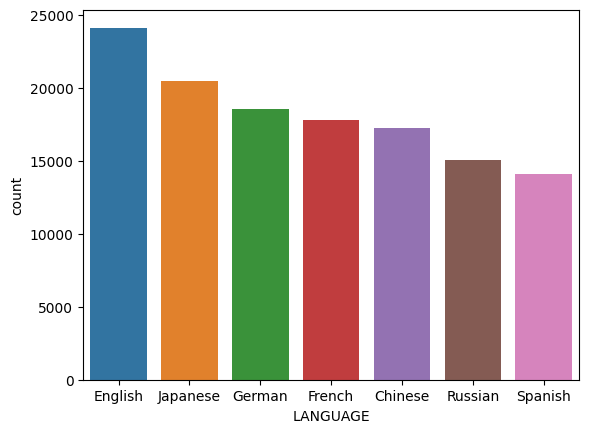

In [ ]:
sns.countplot(data=df, x="LANGUAGE", order=df['LANGUAGE'].value_counts().index)

## The maximum no. of pages are in English Language followed by Japanese
## The lowest count is from Spanish Language

In [ ]:
df.head()
df_view = df.copy()


In [ ]:
df_view.head()

,NAME,LANGUAGE,ACCESS_TYPE,ACCESS_ORIGIN,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1,Chinese,all-access,spider,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM,Chinese,all-access,spider,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C,Chinese,all-access,spider,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute,Chinese,all-access,spider,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You,Chinese,all-access,spider,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
df_view.drop(columns = ['NAME','ACCESS_TYPE','ACCESS_ORIGIN'], inplace = True)
df_view.head()

,LANGUAGE,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,Chinese,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,Chinese,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,Chinese,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,Chinese,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,Chinese,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
df_view['Total_Views'] = df_view.sum(axis = 1)
df_view.head()

<ipython-input-88-73579edd3d06>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_view['Total_Views'] = df_view.sum(axis = 1)


,LANGUAGE,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Total_Views
0,Chinese,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,11966.0
1,Chinese,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,13966.0
2,Chinese,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,2862.0
3,Chinese,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,9419.0
4,Chinese,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,2662.0


In [ ]:
first_c = df_view.pop('Total_Views')
df_view.insert(1,'Total_Views',first_c)

In [ ]:
df_view = df_view[['LANGUAGE','Total_Views']]
df_view.head()

,LANGUAGE,Total_Views
0,Chinese,11966.0
1,Chinese,13966.0
2,Chinese,2862.0
3,Chinese,9419.0
4,Chinese,2662.0


,LANGUAGE,Total_Views
0,Chinese,3.171985e+09
2,French,6.377824e+09
5,Russian,7.998366e+09
4,Japanese,8.571290e+09
3,German,8.862014e+09
6,Spanish,9.490200e+09
1,English,5.874876e+10


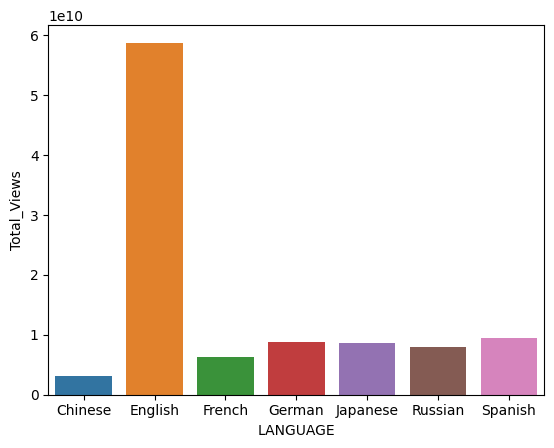

In [ ]:
df_view = df_view.groupby('LANGUAGE').agg({'Total_Views':pd.Series.sum}).rename(columns={"LANGUAGE": "Total_Views"})
df_view.reset_index(inplace = True)
sns.barplot(x ='LANGUAGE', y ='Total_Views', data = df_view)
for i in ax.containers:
    ax.bar_label(i,)
df_view.sort_values(by  = 'Total_Views', ascending = True)
# df.sort_values(by='col1', ascending=False)

In [ ]:
df2 = df.copy()

In [ ]:
df.drop(columns = ['NAME'], inplace = True)
df.head()

,LANGUAGE,ACCESS_TYPE,ACCESS_ORIGIN,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,Chinese,all-access,spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,Chinese,all-access,spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,Chinese,all-access,spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,Chinese,all-access,spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,Chinese,all-access,spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
df['ACCESS_ORIGIN'].unique()

array(['spider', 'all-agents'], dtype=object)

In [ ]:
df['ACCESS_TYPE'].unique()

array(['all-access', 'desktop', 'mobile-web'], dtype=object)

In [ ]:
df['LANGUAGE'] = df['LANGUAGE'].map({'Chinese':'1','French':'2','English':'3','Russian':'4','German':'5','Japanese':'6','Spanish':'7','French':'8'})
df['ACCESS_TYPE'] = df['ACCESS_TYPE'].map({'all-access':'1','desktop':'2','mobile-web':'3'})
df['ACCESS_ORIGIN'] = df['ACCESS_ORIGIN'].map({'spider':'1','all-agents':'2'})

In [ ]:
df['ACCESS_ORIGIN'].unique()

array(['1', '2'], dtype=object)

In [ ]:
df['ACCESS_TYPE'].unique()

array(['1', '2', '3'], dtype=object)

In [ ]:
df.head()

,LANGUAGE,ACCESS_TYPE,ACCESS_ORIGIN,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,1,1,1,18.0,11.0,5.0,13.0,14.0,9.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,1,1,1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,1,1,1,1.0,0.0,1.0,1.0,0.0,4.0,0.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,1,1,1,35.0,13.0,10.0,94.0,4.0,26.0,14.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


## Applying ADF test to check whether the Data is Stationery or Non Stationery.
## For ARIMA model - it is must to have Stationery Data

In [ ]:
df2.drop(columns = ['NAME','LANGUAGE','ACCESS_TYPE','ACCESS_ORIGIN'], inplace = True)
df2.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
df3 = df2.T
df3.index.rename('DATE', inplace = True)
# df3['DATE'] = pd.to_datetime(df['DATE'])
df3.index = pd.to_datetime(df3.index)
df3_0 = df3[[0]]
df3_0.rename(columns = {0:'Views'}, inplace=True)
df3_0.head()



<ipython-input-101-552d09f4bbc6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_0.rename(columns = {0:'Views'}, inplace=True)


,Views
DATE,
2015-07-01,18.0
2015-07-02,11.0
2015-07-03,5.0
2015-07-04,13.0
2015-07-05,14.0


<Axes: xlabel='DATE'>

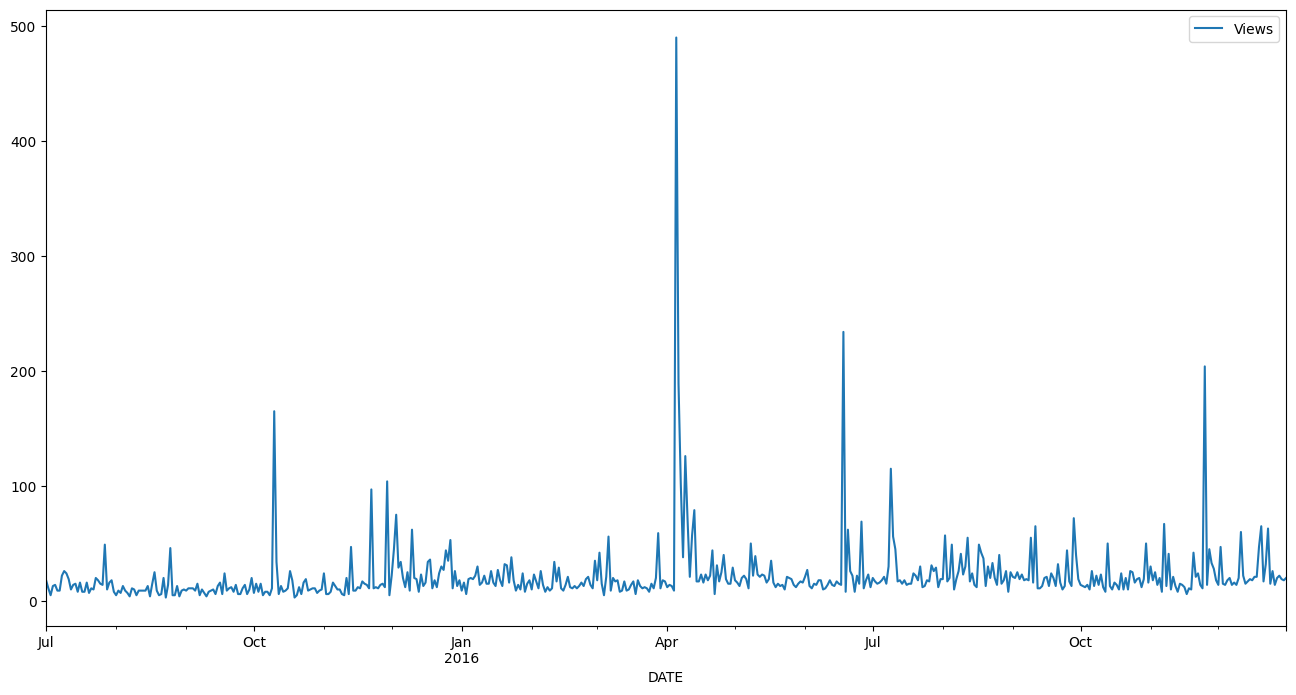

In [ ]:
df3_0.plot(figsize = (16,8))

## Applying ADF (Augmented Dickey Fuller) Test on a sample page date

In [ ]:
def df_test(data):
  result = adfuller(data)
  if result[1] < 0.05:
    print("Data is stationery")
  else:
    print("Data is NON stationerysince P value ",result[1].round(2),"is greater than threshold P value")

df_test(df3_0)

Data is stationery


## Time Series Decomposition

In [ ]:
df3_0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Views   550 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


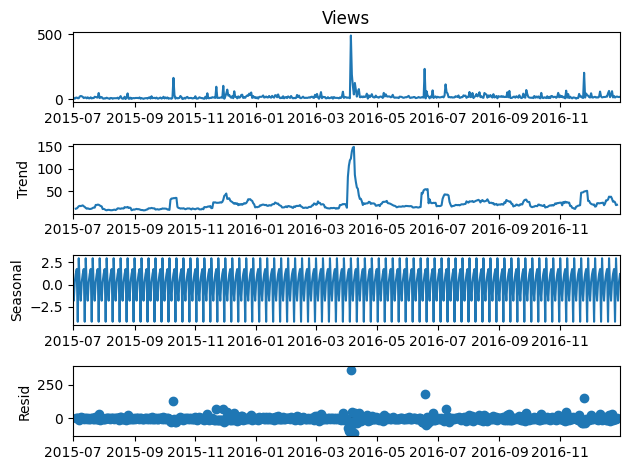

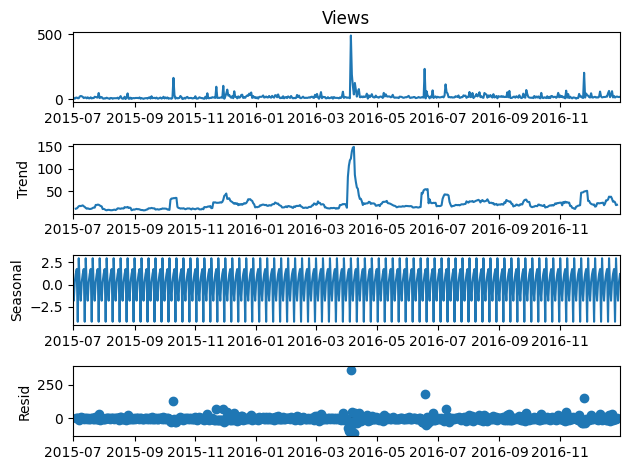

In [ ]:
import statsmodels.api as sm
model = sm.tsa.seasonal_decompose(df3_0.Views)
model.plot()

## ACF and PACF

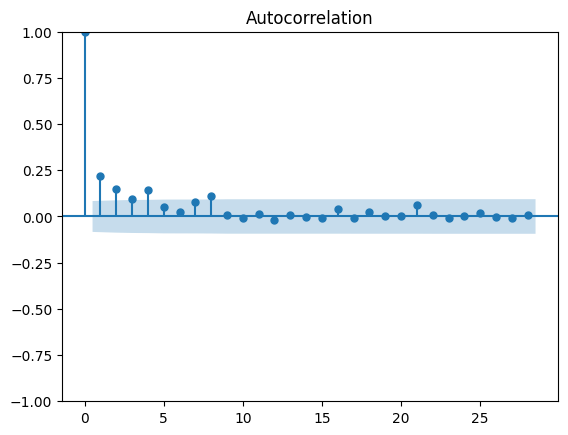

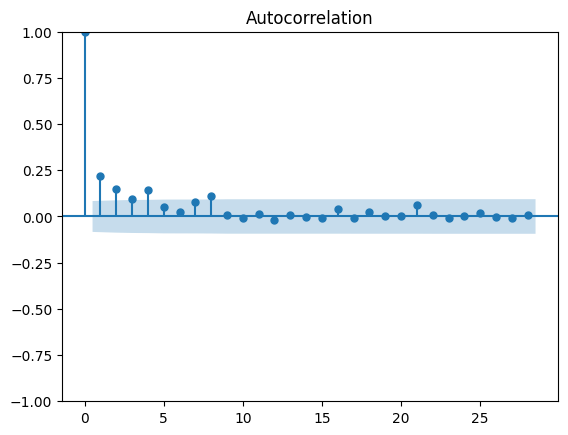

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df3_0)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


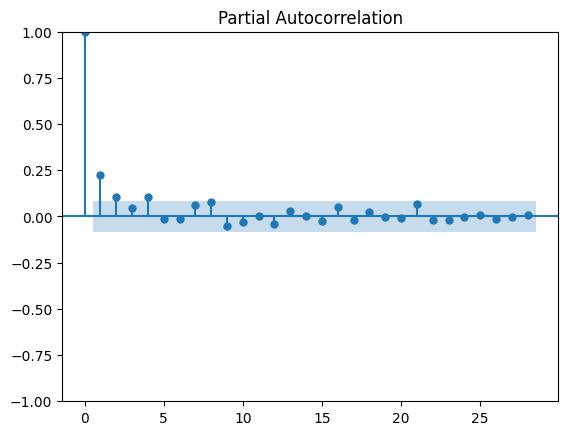

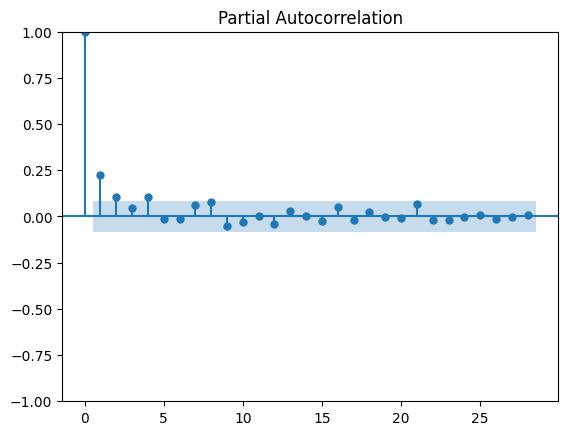

In [ ]:
plot_pacf(df3_0)

#ARIMA

## Differentiation not needed since our sample dataset is stationery

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df3_0.Views, order = (1,0,1))
model = model.fit(disp = False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
model.forecast(steps = 30)

2017-01-01    21.224817
2017-01-02    20.908097
2017-01-03    20.596102
2017-01-04    20.288763
2017-01-05    19.986010
2017-01-06    19.687775
2017-01-07    19.393990
2017-01-08    19.104589
2017-01-09    18.819507
2017-01-10    18.538679
2017-01-11    18.262041
2017-01-12    17.989531
2017-01-13    17.721088
2017-01-14    17.456650
2017-01-15    17.196159
2017-01-16    16.939554
2017-01-17    16.686779
2017-01-18    16.437776
2017-01-19    16.192488
2017-01-20    15.950861
2017-01-21    15.712839
2017-01-22    15.478369
2017-01-23    15.247398
2017-01-24    15.019873
2017-01-25    14.795744
2017-01-26    14.574959
2017-01-27    14.357468
2017-01-28    14.143223
2017-01-29    13.932175
2017-01-30    13.724277
Freq: D, Name: predicted_mean, dtype: float64

<Axes: >

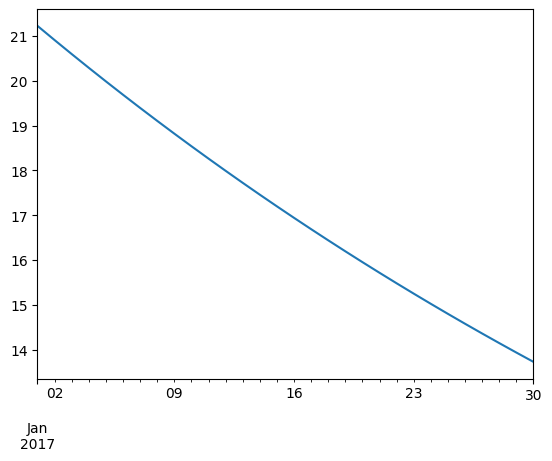

In [ ]:
model.forecast(steps = 30).plot()

# Questions and their Business Insights
1- Defining the problem statements and where can this and modifications of this be used?
Ans - Defined in the beginning of this notebook

2 - Write 3 inferences you made from the data visualizations
==> The maximum no. of pages are in English Language followed by Japanese
==> The lowest count is from Spanish Language

3- What does the decomposition of series do?
Ans - It extracts the seasonality, trend from the series.

4 - What level of differencing gave you a stationary series?
Ans - Since there were aroudn 145k pages, so stationarity was checked on a couple of pages. They were found to be stationery, so no differecing was done.


5- Difference between arima, sarima & sarimax.
ARIMA - Takes care of AR and MA models but it is required to have the data as stationery.
SARIMA - Takes care of AR and MA models including seasonality.
SARIMAX - Is same as SARIMA except that it takes Exogenous variable into consideration.


6 - Compare the number of views in different languages
Ans - Chines and French have lowest views and  English and Spanish have highest views
